## 0. Importado de librerías (valor 0.1) 

**Resuelva los siguientes ejercicios acá mismo en un cuaderno de Jupyter con su nombre, código y la palabra `semana_13`. Importe todas las librerías que crea convenientes.**

### Estudiante: Francisco Javier Díaz Perdomo COD:201912252
$$
\newcommand{\pap}[1]{\left(#1\right)}
\newcommand{\pas}[1]{\left[#1\right]}
\newcommand{\pac}[1]{\left\{#1\right\}}
\newcommand{\pav}[1]{\left\vert#1\right\vert}
\newcommand{\rv}{\vec{r}}
\newcommand{\rb}{\mathbf{r}}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xv}{\vec{x}}
\newcommand{\xbr}{\bar{x}}
\newcommand{\ome}{\omega}
\newcommand{\lam}{\lambda}
\newcommand{\dd}{\mathrm{d}}
\newcommand{\ee}{\mathrm{e}}
\newcommand{\eps}{\epsilon}
\newcommand{\iun}{\hat{\boldsymbol{\imath}}}
\newcommand{\jun}{\hat{\boldsymbol{\jmath}}}
\newcommand{\pr}{^{\prime}}
\newcommand{\chinu}{\chi_{\nu}^2}
$$

In [1]:
!python -m pip install pyforest
!python -m pip install matplotlib
!python -m pip install scipy

import numpy as np
import matplotlib.pyplot as plt
import random as rd
from scipy.integrate import quad
%matplotlib inline

## 1. Calculando integrales (valor 1.6) 

Se sabe el siguiente resultado del cálculo integral:
$$
\int_{-\sqrt{3}}^{\sqrt{3}} \frac{1}{x^2+1} \dd x = \frac{2\pi}{3}
\tag{1}
$$
1. Usted debe calcular la integral (1) en el intervalo $\pas{-\sqrt{3},\sqrt{3}}$ mediante método de Monte-Carlo con 10000 puntos y mediante un método más preciso de `scipy`, además de calcular el valor exacto. Mediante tres `print`, usted debe publicar estos tres resultados. Note que el valor máximo de la función es 1.
2. Usted debe graficar los puntos del método de Monte-Carlo mediante `plt.scatter` tal como se muestra en el ejemplo.

In [2]:
# 1. Calculando integrales
#1.1. Cálculo de integrales
 
f=lambda x:1/((x**2)+1)
xmin,xmax=-(3**(1/2)),(3**(1/2))
ymin,ymax=0,1
Nmax=10000
N=0
M=0
rd.seed(10)
while N<Nmax-1:
    x=rd.uniform(xmin,xmax)
    y=rd.uniform(ymin,ymax)
    N+=1
    if y<f(x):
        M+=1
integ_scipy,err=quad(f,xmin,xmax)
print("El valor de la integral hallado con el método Monte-Carlo es {0}".format((ymax-ymin)*(xmax-xmin)*M/N))
print("El valor de la integral hallado con Scipy es {0}".format(integ_scipy))
print("El valor de la integral utilizando el resultado analítico es {0}".format(2*np.pi/3))

El valor de la integral hallado con el método Monte-Carlo es 2.0956446314599737
El valor de la integral hallado con Scipy es 2.0943951023931957
El valor de la integral utilizando el resultado analítico es 2.0943951023931953


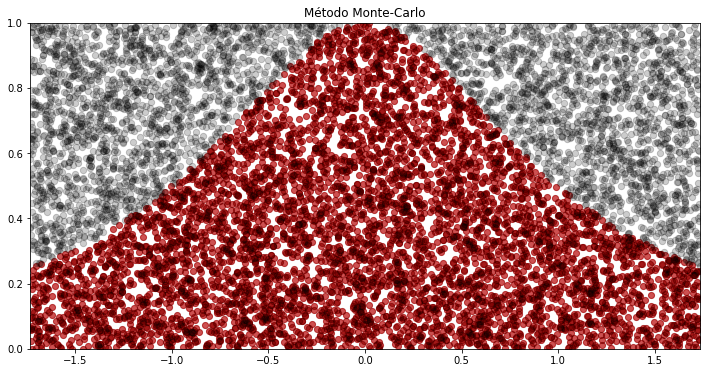

In [3]:
# 1.2. Graficando

xc= np.random.rand(Nmax)*(xmax-xmin)+xmin
yc= np.random.rand(Nmax)*(ymax-ymin)+ymin


index = np.where((f(xc)-yc) > 0.0)

plt.figure(figsize=(12,6))
plt.scatter(xc[index],yc[index],color ='red',alpha =0.6)
plt.scatter(xc,yc,color='k',alpha = 0.2, s = 40)
plt.xlim (xmin,xmax)
plt.ylim (0,1)
plt.title("Método Monte-Carlo")
plt.show()

## 2. Metrópolis-Hastings para una distribución $y(x)$ (valor 1.7)

Usted deberá generar 200000 números aleatorios que sigan la distribución:
$$
y(x)=x^2\ee^{-10\pav{x}}
\tag{2}
$$
en el intervalo $\pas{-1.5,1.5}$. Esto lo deberá hacer usando el método **Metrópolis-Hashtings** explicado en el video de referencia. Además, usted deberá hacer una gráfica donde se superponga el histograma de los 200000 números junto a la curva de $y(x)$. Recuerde que ambas gráficas deben estar debidamente normalizadas.

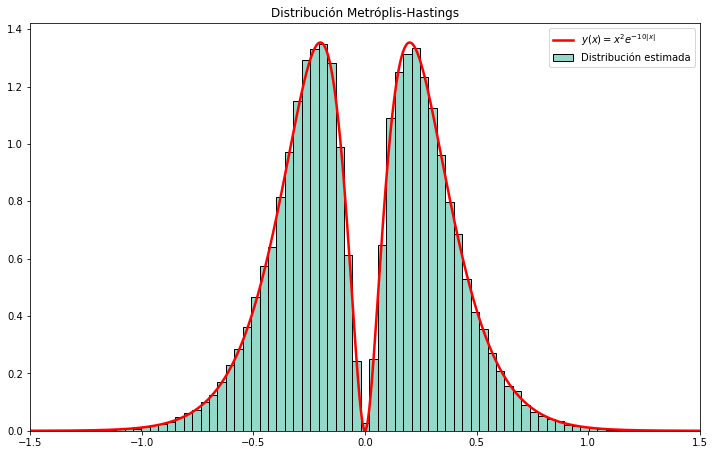

In [4]:
# 2. Metrópolis-Hastings para una distribución y(x)

fy=lambda x:(x**2)*np.exp(-10*np.absolute(x))
xmin,xmax=-1.5,1.5
Nmax=200000
walk=[]
walk.append(np.random.rand()*(xmax-xmin)+xmin)
for i in range(Nmax):
    x= rd.random()*2-1
    alpha=fy(x+walk[-1])/fy(walk[-1])
    
    if alpha >= 1.0:
        walk.append(x+walk[-1])
    else:
        beta= rd.random()
        if (beta <= alpha):
            walk.append(x+walk[-1])
        else:
            walk.append(walk[-1])
            
       
walk=np.array(walk)
plt.figure(figsize=(12,12/1.6))
plt.hist(walk,bins=80,density=True,color=(0.3,0.75,0.65,0.6),edgecolor="k")
plt.xlim(xmin,xmax)
xx=np.linspace(xmin,xmax,1000)
norm,err=quad(fy,xmin,xmax)
yy=fy(xx)/norm
plt.plot(xx,yy,linewidth=2.5,color='r')
plt.title("Distribución Metróplis-Hastings")
plt.legend([r'$y(x)=x^2 e^{-10|x|}$','Distribución estimada'],loc='best')
plt.show()

## 3. Camino aleatorio (valor 1.6)

Usted deberá generar un camino aleatorio que parta del punto $x=0$ en el tiempo $t=0$. En pasos de $\Delta t =1$ usted debe decidir si en el siguiente paso se avanza o retrocede una unidad en $x$. En cada paso, la probabilidad de avanzar será del 70%, mientras que la de retroceder será de 30%. El camino aleatorio debe llegar hasta el tiempo t=3000. Este camino aleatorio debe hacerse con `numpy.random.rand()` y debe usar como semilla `numpy.random.seed(10)`.

Como visualización de su resultado, usted deberá graficar mediante `plt.plot` tanto el camino aleatorio $x(t)$ como la función $\bar{x}(t)=0.4t$ (esta función representa la trayectoria media en cualquier punto $t$).

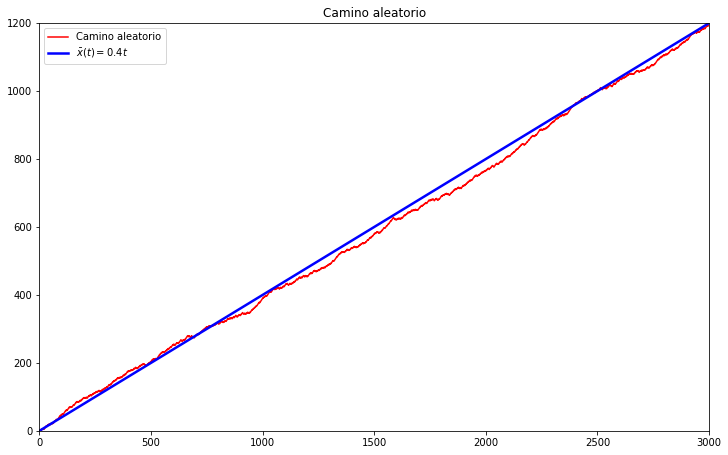

In [5]:
# 3. Camino aleatorio
np.random.seed(10)
def caminata(T):
    p=0.7
    deltax=1
    x_0=0
    X=[x_0]
    for i in range(2,T):
        if (np.random.rand()<p):
            x_0=x_0 +deltax
            X.append(x_0)
        else:
            x_0= x_0-deltax
            X.append(x_0)
            
    X=np.array(X)
    return X
X=caminata(3000)
xx=np.linspace(0,3000,3000)
plt.figure(figsize=(12,12/1.6))
plt.plot(X,color = 'r')
plt.plot(xx,0.4*xx,linewidth=2.5,color='b')
plt.xlim (0,3000)
plt.ylim (0,1200)
plt.title("Camino aleatorio")
plt.legend(['Camino aleatorio',r'$\bar{x}(t)=0.4t $'],loc='best')
plt.show()
    